In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_2716\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('C:/Users/USER/Downloads/DATA/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['class']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=101)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
param_grid = {'n_estimators':[50,100],
              'learning_rate':[0.05,0.1,0.2],
              'max_depth':[3,4,5]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)

In [8]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [9]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

In [10]:
predictions = grid.predict(X_test)

In [11]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

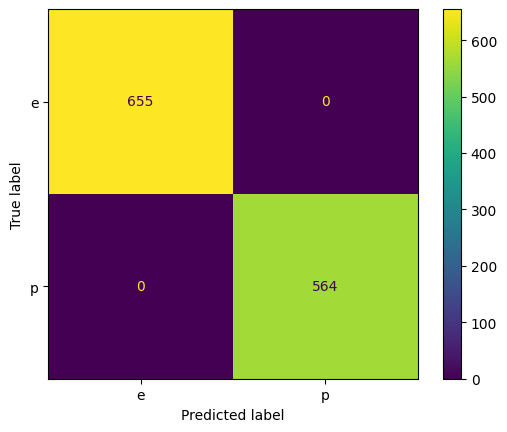

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test,predictions)

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [15]:
feat_import = grid.best_estimator_.feature_importances_

In [16]:
imp_feat = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [18]:
imp_feat[imp_feat['Importance']>0.0005]

,Importance
cap-shape_c,0.000632
cap-surface_g,0.001672
bruises_t,0.067306
odor_f,0.009538
odor_l,0.004609
odor_m,0.001622
odor_n,0.623008
odor_p,0.015393
gill-spacing_w,0.004457
gill-size_n,0.002087


In [19]:
imp_feat = imp_feat[imp_feat['Importance']>0.0005].sort_values('Importance')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'stalk-color-above-ring_n'),
  Text(1, 0, 'cap-shape_c'),
  Text(2, 0, 'stalk-color-above-ring_c'),
  Text(3, 0, 'population_y'),
  Text(4, 0, 'stalk-color-below-ring_w'),
  Text(5, 0, 'stalk-surface-above-ring_s'),
  Text(6, 0, 'stalk-color-above-ring_w'),
  Text(7, 0, 'stalk-color-below-ring_c'),
  Text(8, 0, 'odor_m'),
  Text(9, 0, 'cap-surface_g'),
  Text(10, 0, 'ring-number_o'),
  Text(11, 0, 'gill-size_n'),
  Text(12, 0, 'ring-type_n'),
  Text(13, 0, 'gill-spacing_w'),
  Text(14, 0, 'odor_l'),
  Text(15, 0, 'spore-print-color_u'),
  Text(16, 0, 'odor_f'),
  Text(17, 0, 'odor_p'),
  Text(18, 0, 'spore-print-color_h'),
  Text(19, 0, 'stalk-root_e'),
  Text(20, 0, 'stalk-root_r'),
  Text(21, 0, 'spore-print-color_r'),
  Text(22, 0, 'stalk-surface-below-ring_y'),
  Text(23, 0, 'bruises_t'),
  Text(24, 0, 'stalk-root_c'),
  Tex

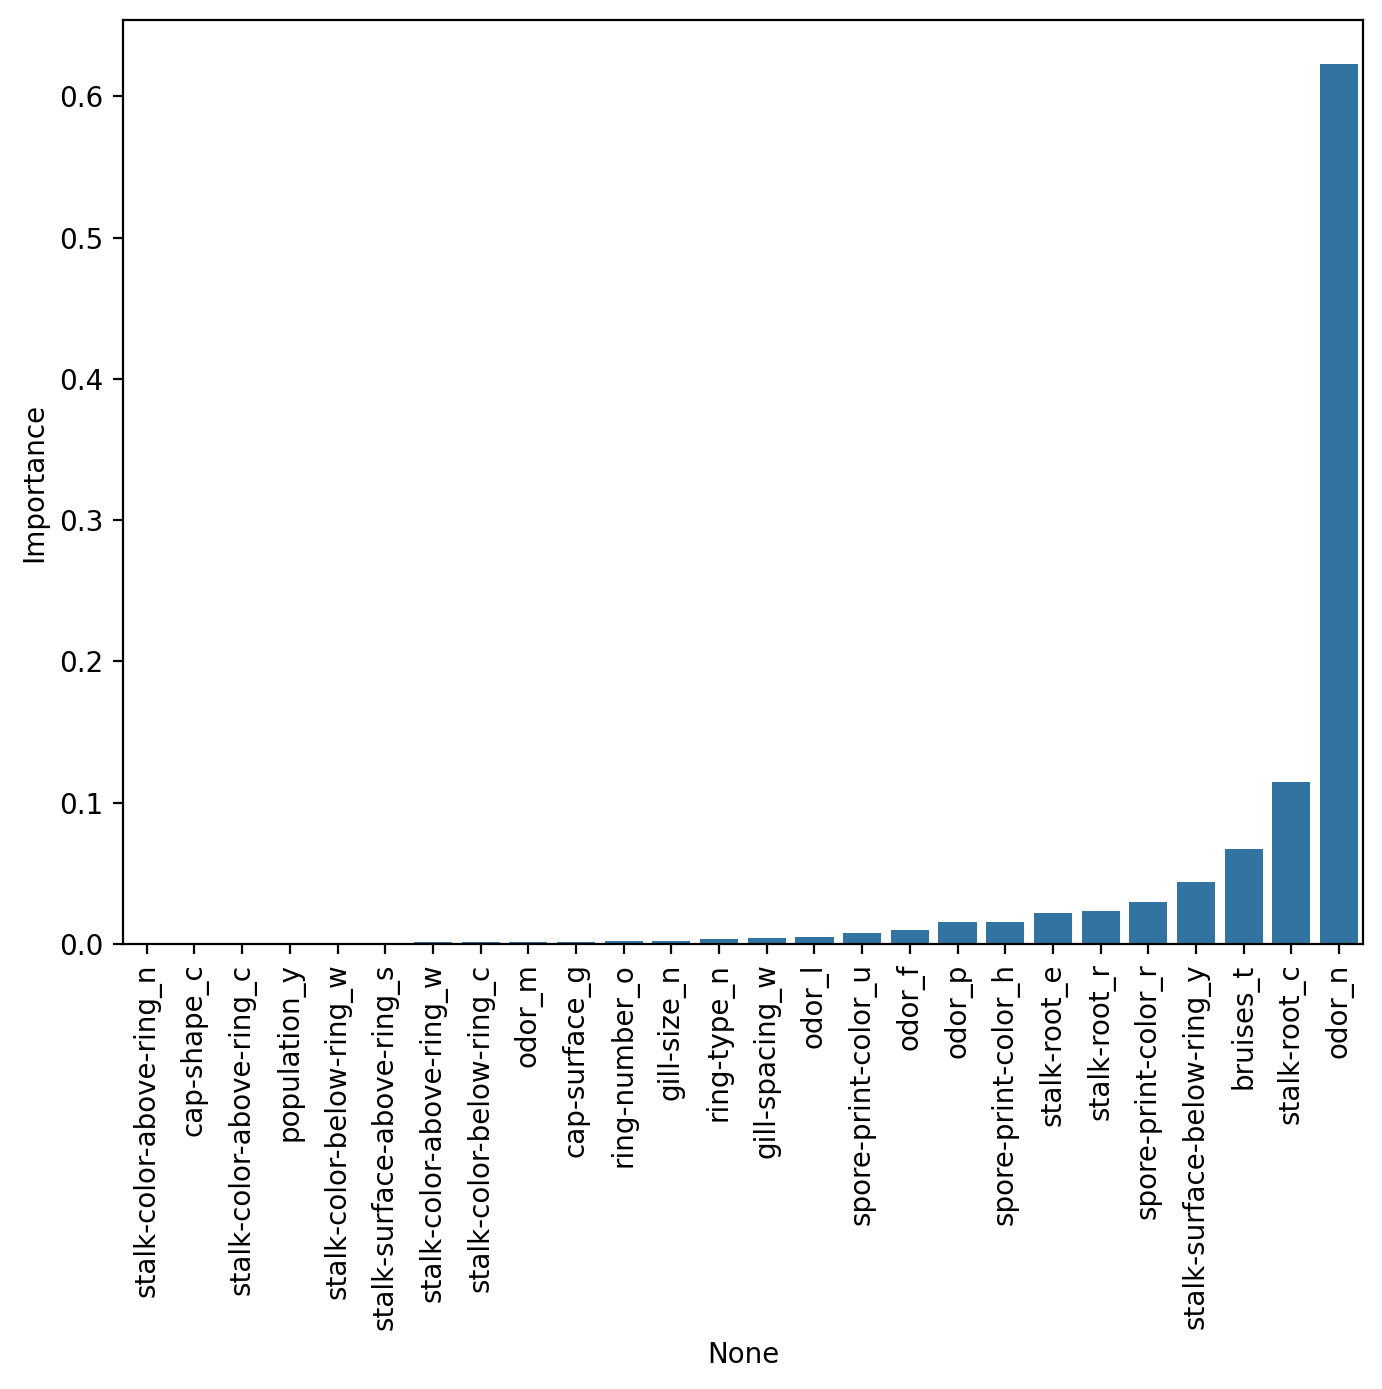

In [20]:
plt.figure(figsize=(8,6),dpi=200)
sns.barplot(data=imp_feat,x=imp_feat.index,y='Importance')
plt.xticks(rotation=90)